In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from floris.layout_visualization import plot_turbine_labels, plot_turbine_points

from flasc.model_fit.cost_library import total_wake_loss_error
from flasc.model_fit.model_fit import ModelFit
from flasc.model_fit.opt_library import agg_opt_sectors, opt_pair, opt_sector

In [2]:
# Load the data from previous example
with open("farm_data.pkl", "rb") as f:
    data = pickle.load(f)

# Unpack
df_jensen = data["df_jensen"]
df_gch = data["df_gch"]
df_emg = data["df_emg"]
df_turbo = data["df_turbo"]
fmodel_emg = data["fmodel_emg"]
fmodel_emg_unc = data["fmodel_emg_unc"]

In [3]:
# Define a list of parameters to tune
parameter_list = [
    ("wake", "wake_velocity_parameters", "empirical_gauss", "wake_expansion_rates"),
    ("wake", "wake_velocity_parameters", "empirical_gauss", "wake_expansion_rates"),
]

parameter_name_list = ["we_1", "we_2"]

parameter_range_list = [(0.001, 0.05), (0.001, 0.05)]

parameter_index_list = [0, 1]

In [4]:
# Define the ModelFit object


# Now pass the above cost function to the ModelFit class
mf = ModelFit(
    df_jensen,
    fmodel_emg,
    total_wake_loss_error,
    parameter_list=parameter_list,
    parameter_name_list=parameter_name_list,
    parameter_range_list=parameter_range_list,
    parameter_index_list=parameter_index_list,
)

<Axes: >

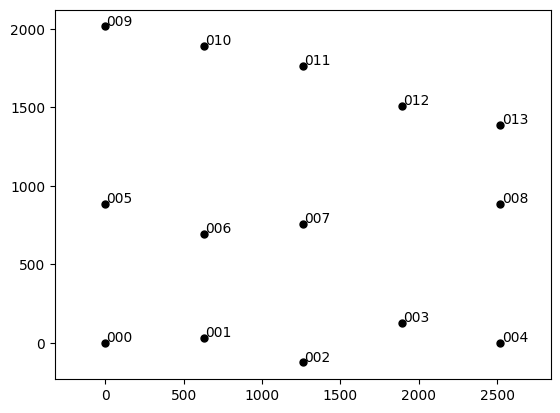

In [5]:
## Try a few optimizations

# Show the layout again

fig, ax = plt.subplots()
plot_turbine_points(fmodel_emg, ax)
plot_turbine_labels(fmodel_emg, ax)

## Test pairwise optimization

In [6]:
# Try sweep_opt_pair for 11 and 7
res_optuna = opt_pair(mf, 0, 5, verbose=True)

[I 2024-10-08 14:01:01,184] A new study created in memory with name: no-name-f3eb3ccc-451d-41be-aa91-92c13b8c6ec5
[I 2024-10-08 14:01:01,676] Trial 0 finished with value: 12.606566554986383 and parameters: {'we_1': 0.04148549714692895, 'we_2': 0.027216480154961142}. Best is trial 0 with value: 12.606566554986383.
[I 2024-10-08 14:01:01,906] Trial 1 finished with value: 0.009693430921366175 and parameters: {'we_1': 0.015881558254173832, 'we_2': 0.03702280571736458}. Best is trial 1 with value: 0.009693430921366175.
[I 2024-10-08 14:01:02,129] Trial 2 finished with value: 6.623360606417843 and parameters: {'we_1': 0.03394904446316388, 'we_2': 0.035690665342707824}. Best is trial 1 with value: 0.009693430921366175.
[I 2024-10-08 14:01:02,351] Trial 3 finished with value: 3.2788016534768483 and parameters: {'we_1': 0.005874134836494248, 'we_2': 0.008532583503300505}. Best is trial 1 with value: 0.009693430921366175.
[I 2024-10-08 14:01:02,558] Trial 4 finished with value: 3.218494085164862

In [7]:
res_seq = opt_pair(mf, 0, 5, verbose=True, atomic_opt="atomic_opt_sweep_sequential")

floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


Optimizing parameter 'we_1' (1/2)
.Testing range (0.001, 0.05) in 10 steps
..Testing parameter value 0.001 (1/10)
..Testing parameter value 0.00644444 (2/10)
..Testing parameter value 0.0118889 (3/10)
..Testing parameter value 0.0173333 (4/10)
..Testing parameter value 0.0227778 (5/10)
..Testing parameter value 0.0282222 (6/10)
..Testing parameter value 0.0336667 (7/10)
..Testing parameter value 0.0391111 (8/10)
..Testing parameter value 0.0445556 (9/10)
..Testing parameter value 0.05 (10/10)
.Found optimal value for parameter 'we_1': 0.017333333333333333
.best cost: 0.02473947342325134
Optimizing parameter 'we_2' (2/2)
.Testing range (0.001, 0.05) in 10 steps
..Testing parameter value 0.001 (1/10)
..Testing parameter value 0.00644444 (2/10)
..Testing parameter value 0.0118889 (3/10)
..Testing parameter value 0.0173333 (4/10)
..Testing parameter value 0.0227778 (5/10)
..Testing parameter value 0.0282222 (6/10)
..Testing parameter value 0.0336667 (7/10)
..Testing parameter value 0.03911

In [8]:
# Compare the fits
print(f"OptTuna yields a cost of: {res_optuna['best_cost']:g})")
print(f"Sequential yields a cost of {res_seq['best_cost']:g})")

OptTuna yields a cost of: 4.42909e-05)
Sequential yields a cost of 0.0247395)


## Single-sector optimization

In [9]:
res_optuna = opt_sector(mf, sector=10, wind_radius=15.0, verbose=True)

[I 2024-10-08 14:01:26,532] A new study created in memory with name: no-name-694e0348-b995-43bd-8904-ca8b8d3676ab


Shape of df_ after filtering: (78, 17)
Min/Max Wind Direction (0 -- 360): 0.0, 360.0
Min/Max Wind Direction (-180 -- +180): -4.0, 24.0
Upstream turbines for sector 10: [9, 10, 11, 12, 13]
Downstream turbines for sector 10: [0, 1, 2, 3, 4, 5, 6, 7, 8]


[I 2024-10-08 14:01:26,744] Trial 0 finished with value: 16.248470707737305 and parameters: {'we_1': 0.04182512718699759, 'we_2': 0.03547741473952135}. Best is trial 0 with value: 16.248470707737305.
[I 2024-10-08 14:01:27,095] Trial 1 finished with value: 21.867142107706158 and parameters: {'we_1': 0.046932250646313366, 'we_2': 0.043648609102272196}. Best is trial 0 with value: 16.248470707737305.
[I 2024-10-08 14:01:27,298] Trial 2 finished with value: 0.1852056809537625 and parameters: {'we_1': 0.019907768938997688, 'we_2': 0.02225981561330898}. Best is trial 2 with value: 0.1852056809537625.
[I 2024-10-08 14:01:27,500] Trial 3 finished with value: 14.0100683851943 and parameters: {'we_1': 0.03988017406951164, 'we_2': 0.030291675977591737}. Best is trial 2 with value: 0.1852056809537625.
[I 2024-10-08 14:01:27,707] Trial 4 finished with value: 18.746951558379653 and parameters: {'we_1': 0.043658072684140216, 'we_2': 0.0468795812598061}. Best is trial 2 with value: 0.1852056809537625

In [10]:
res_seq = opt_sector(
    mf, sector=10, wind_radius=15.0, verbose=True, atomic_opt="atomic_opt_sweep_sequential"
)

Shape of df_ after filtering: (78, 17)
Min/Max Wind Direction (0 -- 360): 0.0, 360.0
Min/Max Wind Direction (-180 -- +180): -4.0, 24.0
Upstream turbines for sector 10: [9, 10, 11, 12, 13]
Downstream turbines for sector 10: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Optimizing parameter 'we_1' (1/2)
.Testing range (0.001, 0.05) in 10 steps
..Testing parameter value 0.001 (1/10)


floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.


..Testing parameter value 0.00644444 (2/10)
..Testing parameter value 0.0118889 (3/10)
..Testing parameter value 0.0173333 (4/10)
..Testing parameter value 0.0227778 (5/10)
..Testing parameter value 0.0282222 (6/10)
..Testing parameter value 0.0336667 (7/10)
..Testing parameter value 0.0391111 (8/10)
..Testing parameter value 0.0445556 (9/10)
..Testing parameter value 0.05 (10/10)
.Found optimal value for parameter 'we_1': 0.017333333333333333
.best cost: 0.16547191301708064
Optimizing parameter 'we_2' (2/2)
.Testing range (0.001, 0.05) in 10 steps
..Testing parameter value 0.001 (1/10)
..Testing parameter value 0.00644444 (2/10)
..Testing parameter value 0.0118889 (3/10)
..Testing parameter value 0.0173333 (4/10)
..Testing parameter value 0.0227778 (5/10)
..Testing parameter value 0.0282222 (6/10)
..Testing parameter value 0.0336667 (7/10)
..Testing parameter value 0.0391111 (8/10)
..Testing parameter value 0.0445556 (9/10)
..Testing parameter value 0.05 (10/10)
.Found optimal value f

In [11]:
# Compare the fits
print(f"OptTuna yields a cost of: {res_optuna['best_cost']:g})")
print(f"Sequential yields a cost of {res_seq['best_cost']:g})")

OptTuna yields a cost of: 1.32948e-05)
Sequential yields a cost of 0.00059004)


## Look at aggregated optimization

In [12]:
agg_opt_sectors(mf, wd_sectors=np.arange(0, 360, 45.0), wind_radius=22.5)

Starting optimization across 8 sectors
Optimizing for sector 1/8 (0.0 degrees)


[I 2024-10-08 14:01:53,014] A new study created in memory with name: no-name-56d0f4a5-36d2-4907-850b-a79ef79c39d0
[I 2024-10-08 14:01:53,232] Trial 0 finished with value: 10.070010878824705 and parameters: {'we_1': 0.03638214266042667, 'we_2': 0.04764565111096502}. Best is trial 0 with value: 10.070010878824705.
[I 2024-10-08 14:01:53,449] Trial 1 finished with value: 5.280320206122456 and parameters: {'we_1': 0.032243516994598063, 'we_2': 0.007255299749706624}. Best is trial 1 with value: 5.280320206122456.
[I 2024-10-08 14:01:53,675] Trial 2 finished with value: 9.502898305720148 and parameters: {'we_1': 0.03546315055471826, 'we_2': 0.04634507079996101}. Best is trial 1 with value: 5.280320206122456.
floris.floris_model.FlorisModel WARNING Some velocities at the rotor are negative.
[I 2024-10-08 14:01:53,898] Trial 3 finished with value: 1.0377593612822538 and parameters: {'we_1': 0.0030614094865825444, 'we_2': 0.0326165403381465}. Best is trial 3 with value: 1.0377593612822538.
[I 2

Optimizing for sector 2/8 (45.0 degrees)


[I 2024-10-08 14:02:16,434] Trial 0 finished with value: 0.8566764954632445 and parameters: {'we_1': 0.024834500949077392, 'we_2': 0.01534384612936833}. Best is trial 0 with value: 0.8566764954632445.
[I 2024-10-08 14:02:16,656] Trial 1 finished with value: 9.46602805734509 and parameters: {'we_1': 0.04523632210386388, 'we_2': 0.01674836413077039}. Best is trial 0 with value: 0.8566764954632445.
[I 2024-10-08 14:02:16,876] Trial 2 finished with value: 0.7138298012131424 and parameters: {'we_1': 0.013963844024641847, 'we_2': 0.015589793699767575}. Best is trial 2 with value: 0.7138298012131424.
[I 2024-10-08 14:02:17,107] Trial 3 finished with value: 0.1575862831155271 and parameters: {'we_1': 0.02176680137312866, 'we_2': 0.012219815577049806}. Best is trial 3 with value: 0.1575862831155271.
[I 2024-10-08 14:02:17,328] Trial 4 finished with value: 0.2303673368018461 and parameters: {'we_1': 0.02199585944727339, 'we_2': 0.013966309526798087}. Best is trial 3 with value: 0.157586283115527

KeyboardInterrupt: 